#Exploring Review Data
- let's look at some typical reviews, how many files there are, what the distributions of review lengths and hours played are, etc.

In [1]:
# Pretty much, this is my standard header because I use these following
# two libraries all the time
import sys
import os

In [2]:
# So, let's take a look at how many lines are in our reviews files
# Note: I just started processing GTAV after ending all the other processes
os.chdir('/home/mulhollandm2/reviews_project/reviewer_experience_prediction')
! wc -l data/*.txt

   30910 data/Arma_3.txt
   66500 data/Counter_Strike_Global_Offensive.txt
   17712 data/Counter_Strike.txt
   61900 data/Dota_2.txt
    2346 data/Football_Manager_2015.txt
   65860 data/Garrys_Mod.txt
   19880 data/Grand_Theft_Auto_V.txt
   67076 data/Sid_Meiers_Civilization_5.txt
   63840 data/Team_Fortress_2.txt
   65578 data/The_Elder_Scrolls_V.txt
   49270 data/Warframe.txt
  510872 total


In [3]:
# This is a stripped-down version of the function in read_data_files.py
# Note: I decided to get rid of the language identification rule for the time
# being because I don't want this function to take too long or else it will be
# useless in this context. We will still use the rule, just not in this
# notebook setting.
def get_reviews_for_game(file_name):
    '''
    Get list of reviews in a single game file.

    :param file_name: name of file
    :type file_name: str
    :returns: list of dicts
    '''

    reviews = []
    lines = open(file_name).readlines()
    i = 0
    while i + 1 < len(lines): # We need to get every 2-line couplet
        # Extract the hours value and the review text from each 2-line
        # sequence
        try:
            h = float(lines[i].split()[1].strip())
            r = lines[i + 1].split(' ', 1)[1].strip()
        except (ValueError, IndexError) as e:
            i += 2
            continue
        reviews.append(dict(hours=h,
                            review=r))
        i += 2 # Increment i by 2 since we need to go to the next
            # 2-line couplet
    return reviews

# Sid_Meiers_Civilization_5 Stats

In [4]:
# So, let's first get all of the reviews for the game with the smallest amount of
# review data
reviews = get_reviews_for_game('data/Sid_Meiers_Civilization_5.txt')

In [5]:
# First of all, how many reviews are there?
print('number of reviews: {}'.format(len(reviews)))

number of reviews: 33538


# Sid_Meiers_Civilization_5: Review Length Distribution

In [6]:
# Here's a couple reviews from the beginning of the file
reviews[:3]

[{'hours': 144.5,
  'review': '50 Hours into your latest save, all is going well. Only 3 leaders left Gandhi, Caesar and Washington. you draft an \'end game\' plan in your mind, you will make friends with Gandhi (for obvious reasons he\'s chill) then procede to befriend Caesar. Then you will take out Washington because he is a  and did not accept an open border agreement 3000 years prior HE MUST PAY. 20 turns later all is going to plan, we are now on Washingtons doorstep, Gandhi and Caesar appear to love and probably fear your superpower nation. All we need to do is eliminate the pesky Americans and ith all our military now on American soil this should not take long. Then after the swift invasion of America we will make a vote for world peace at the U.N (in rome of course) with our new found Indian and Roman brethren it is a sure win! But all of a sudden the distant droning of nuclear sirens start, quickly they become louder and louder, "what is this!?" you think to yourself, a false a

In [8]:
# Let's measure the lengths of each review using a "list comprehension"
lengths = [len(review['review']) for review in reviews]
# Let's print out the first 10 lengths, just to see what we're working with
lengths[:10]

[2630, 38, 223, 163, 499, 2116, 179, 21, 47, 25]

In [9]:
# Compute the average length value
avg_len = sum(lengths)/len(lengths)
print('average length: {}'.format(avg_len))

average length: 178.00313077702904


In [10]:
min_len = min(lengths)
print('minimum review length = {}'.format(min_len))

minimum review length = 1


In [11]:
max_len = max(lengths)
print('maximum review length = {}'.format(max_len))

maximum review length = 8000


In [12]:
# Let's try to make a list of rounded length values where we round to the nearest
# 300 (I know, that's a pretty strange kind of thing to do)
from math import ceil
# We can do this by diving each length by 300, then rounding up, then multiplyig by 300
rounded_lengths = [ceil(l/300)*300 for l in lengths]
print('original lengths (first 10):          {}\nrounded lengths (to the nearest 300): {}'.format(
    lengths[:10],
    rounded_lengths[:10]))

original lengths (first 10):          [2630, 38, 223, 163, 499, 2116, 179, 21, 47, 25]
rounded lengths (to the nearest 300): [2700, 300, 300, 300, 600, 2400, 300, 300, 300, 300]


In [13]:
# Now, let's make a frequency distribution with the collections.Counter module
from collections import Counter
rounded_length_fdist = Counter(rounded_lengths)
rounded_length_fdist

Counter({300: 28478, 600: 3125, 900: 968, 1200: 421, 1500: 185, 1800: 95, 2100: 65, 2400: 54, 2700: 53, 3000: 23, 3300: 21, 3900: 15, 3600: 8, 4200: 6, 5100: 5, 8100: 5, 7800: 3, 4500: 2, 6600: 2, 4800: 1, 7200: 1, 6300: 1, 5400: 1})

In [13]:
# It is obvious from looking at the freq. dist. above that length drops off a cliff
# after about 1000 characters
# In fact, for length up to 900, almost 1,050 reviews are accounted for, which means
# that only a little over 100 reviews are thinly-distributed over the remaining area
# above 1,000 characters

In [7]:
# Let's try to print out the freq dist in a nice way
# Bear with me as I attempt to use pandas, which is a very nice Python library
import pandas as pd

In [8]:
# Usually, when you use Pandas, you're using a dataframe, but a dataframe, as I understand
# it, it just made up on a set of "Series"
# Let's make a Series from our rounded lengths and then call its value_counts() method to
# get exactly what collections.Counter was doing (but we'll be able to use it to make a
# nice plot)
rounded_length_series = pd.Series(rounded_lengths)
rounded_length_series.value_counts()

NameError: name 'rounded_lengths' is not defined

In [18]:
from data import FILTER_DICT
FILTER_DICT['Sid_Meiers_Civilization_5']['MAXLEN']

(array([  3.25710000e+04,   7.01000000e+02,   1.19000000e+02,
          9.70000000e+01,   2.30000000e+01,   9.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          8.00000000e+00]),
 array([  300.,  1080.,  1860.,  2640.,  3420.,  4200.,  4980.,  5760.,
         6540.,  7320.,  8100.]),
 <a list of 10 Patch objects>)

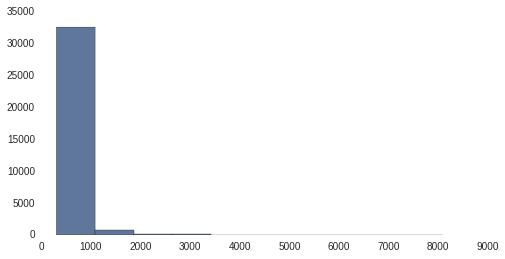

In [19]:
# The table above is nice, but let's do better and try to get a histogram
# Don't worry about all this importing stuff, it's just from something I read in a blog
# post
# Actually, go and check out the blog post here:
# http://nbviewer.ipython.org/github/mwaskom/seaborn/blob/master/examples/plotting_distributions.ipynb
# It's in, you guessed it, an IPython notebook! Shows what you can do with
# matplotlib.
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.hist(rounded_length_series)

#  Sid_Meiers_Civilization_5: Hours Distribution

In [22]:
# That is one nice-looking histogram!
# From it, we can really see just how few reviews there are past 1,000
# For this item, we could probably set the cap at 1,200, let's say
# What do you think?

In [21]:
# Let's do a similar kind of thing for the hours values
hours = [review['hours'] for review in reviews]
hours[:10]

[144.5, 2600.5, 316.9, 3979.9, 14.1, 126.6, 51.1, 152.8, 40.9, 444.1]

In [22]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.0
max: 16202.8


In [26]:
# Compute the average length value
avg_hours = sum(hours)/len(hours)
print('average hours: {}'.format(avg_hours))

average hours: 249.9993857713662


In [27]:
rounded_hours = [ceil(h/300)*300 for h in hours]

In [28]:
rounded_hours[:10]

[300, 2700, 600, 4200, 300, 300, 300, 300, 300, 600]

In [29]:
# Let's use pandas again instead of collections.Counter
rounded_hours_series = pd.Series(rounded_hours)
rounded_hours_series.value_counts()

300      25664
600       4849
900       1537
1200       623
1500       318
1800       186
2100        84
2700        76
2400        62
4200        33
3000        28
3300        22
3900        14
3600        10
5700         8
6600         6
6900         3
4800         3
6300         3
5400         2
7200         1
5100         1
14400        1
11100        1
7800         1
16500        1
0            1
dtype: int64

In [28]:
# Hmm, well, would you look at that! The distribution looks exactly the same
# as that for length!

(array([  3.29920000e+04,   4.36000000e+02,   8.20000000e+01,
          1.40000000e+01,   1.10000000e+01,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([     0.,   1650.,   3300.,   4950.,   6600.,   8250.,   9900.,
         11550.,  13200.,  14850.,  16500.]),
 <a list of 10 Patch objects>)

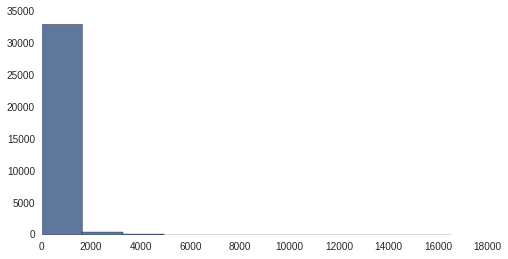

In [30]:
# Let's plot it!
plt.hist(rounded_hours_series)

In [31]:
from data import FILTER_DICT
FILTER_DICT['Sid_Meiers_Civilization_5']['MAXHOURS']

In [30]:
# Yet again, it seems that simply throwing out reviews over 1000 will basically
# result in letting go of very few reviews (and dealing effectively with our
# outlier issue), so (at least for this game), it seems like a good idea to
# set the cap at 1000 hours

In [31]:
# Now that we know that, for Football_Manager_2015.txt, reviews that are under
# 1200 characters in length represent the bulk of the reviews (and that reviews
# that are over that can be thrown out), let's update the FILTER_DICT in
# data/__init__.py. This dictionary will contain keys for each game file and
# those keys themselves will map to dictionaries that contain keys for
# MAXLEN, MAXHOURS, MINLEN, MINHOURS.
# We also know that we want to throw out reviews whose hours played value is
# greater than 1000 (for this particular game), so we can also set that key.
# As for MINLEN and MINHOURS, let's just use 50 and 0, respectively, for now.
# If we find that other values should be used for any given game, we can change
# the values.
# Note that I have already updated the FILTER_DICT for the 'Football_Manager_2015'
# game to show you how it would look. As you figure out the values for the other
# games, updated FILTER_DICT accordingly.

In [32]:
# Playing around with this library called plotly
# Let's try to make a histogram in a slightly different kind of way
import plotly
import plotly.tools as tls
import plotly.plotly as py
from plotly.graph_objs import *
rounded_lengths_data = Data([
                             Histogram(
                                       x=rounded_lengths
                                       )
                             ])

In [33]:
plot_url = py.plot(rounded_lengths_data, filename='basic-histogram')

In [34]:
# Hmm, seems kind of interesting, there's a lot of stuff you can do with
# visualizing the data
# Here's the plot url, but I don't know if anybody but me will be able to see it,
# so, I'm going to try to put the graph directly in the IPython notebook.
plot_url

'https://plot.ly/~mulhod/4'

In [30]:
py.iplot(rounded_lengths_data, filename='basic-histogram')

In [79]:
# It's nice how interactive the graphs from plotly are! Hover around on
# the graph. Also, look at the lower right and right-click the "Play
# with this data! >>" button

In [80]:
# Anyway, this was just an aside. You don't need to do the plotly stuff
# for every game, though it actually does look nicer. Use either plotly or
# matplotlib

# Team_Fortress_2 Stats

In [39]:
reviews = get_reviews_for_game('data/Team_Fortress_2.txt')
reviews[:3]

[{'hours': 201.9,
  'review': 'best place to legally make 13 year olds cry 10/10'},
 {'hours': 2154.2, 'review': 'Hat IRL = $20 Hat In game = $500 i like'},
 {'hours': 4772.4,
  'review': 'Team Fortress 2 was the final, fatal blow to what was left of my social life. And I still like it, 10/10 disregard friends acquire hats.'}]

In [40]:
# First of all, how many reviews are there?
print('number of reviews: {}'.format(len(reviews)))

number of reviews: 31920


In [64]:
len(reviews)

31920

# Team_Fortress_2: Review Length Distribution

In [41]:
lengths = [len(review['review']) for review in reviews]
lengths[:10]

[49, 39, 136, 132, 505, 123, 11, 378, 2751, 1541]

In [43]:
# Compute the average length value
avg_len = sum(lengths)/len(lengths)
print('average length: {}'.format(avg_len))

average length: 150.14395363408522


In [44]:
print("min: {}\nmax: {}".format(min(lengths), max(lengths)))

min: 1
max: 8000


In [45]:
rounded_lengths = [ceil(l/300)*300 for l in lengths]
rounded_lengths[:10]

[300, 300, 300, 300, 600, 300, 300, 600, 3000, 1800]

In [47]:
rounded_length_series = pd.Series(rounded_lengths)
rounded_length_series.value_counts()

300     28496
600      1880
900       710
1200      302
1500      156
1800      109
2100       63
2400       35
3000       28
2700       20
8100       17
3600       16
3300       14
4500       14
4200       12
3900        7
4800        7
5700        7
6900        6
7200        5
6000        5
5100        3
6300        2
5400        2
6600        2
7800        1
7500        1
dtype: int64

(array([  3.10860000e+04,   5.67000000e+02,   9.80000000e+01,
          6.20000000e+01,   2.30000000e+01,   3.30000000e+01,
          1.20000000e+01,   7.00000000e+00,   1.30000000e+01,
          1.90000000e+01]),
 array([  300.,  1080.,  1860.,  2640.,  3420.,  4200.,  4980.,  5760.,
         6540.,  7320.,  8100.]),
 <a list of 10 Patch objects>)

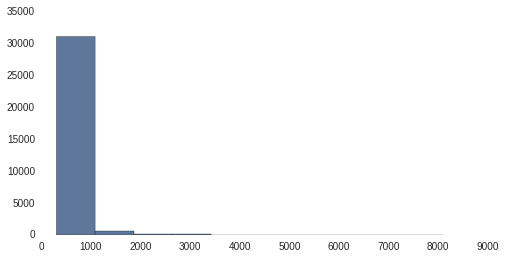

In [48]:
rounded_lengths_series = pd.Series(rounded_lengths)
plt.hist(rounded_lengths_series)

In [57]:
from data import FILTER_DICT
FILTER_DICT['Team_Fortress_2']['MAXLEN']

# Team_Fortress_2: Review Hours Played Distribution

In [58]:
hours = [review['hours'] for review in reviews]
hours[:10]

[201.9, 2154.2, 4772.4, 2384.6, 519.5, 477.8, 3678.7, 459.2, 12548.7, 2404.5]

In [59]:
# Compute the average length value
avg_hours = sum(hours)/len(hours)
print('average hours: {}'.format(avg_hours))

average hours: 832.6986528822044


In [60]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.1
max: 12548.7


In [61]:
rounded_hours = [ceil(h/300)*300 for h in hours]
rounded_hours[:10]

[300, 2400, 4800, 2400, 600, 600, 3900, 600, 12600, 2700]

In [62]:
rounded_hours_series = pd.Series(rounded_hours)
rounded_hours_series.value_counts()

300      11444
600       5930
900       4210
1200      2946
1500      2022
1800      1410
2100      1027
2400       721
2700       554
3000       379
3300       306
3600       238
3900       157
4200       134
4500        96
4800        73
5400        53
5100        51
5700        31
6000        27
6600        16
6900        14
6300        13
7800        12
7200        11
7500         8
8400         6
8100         6
11100        5
9000         5
10200        4
9600         3
10800        2
8700         2
11400        1
9900         1
12600        1
10500        1
dtype: int64

(array([  2.65520000e+04,   3.71200000e+03,   1.08000000e+03,
          3.54000000e+02,   1.24000000e+02,   4.90000000e+01,
          2.60000000e+01,   9.00000000e+00,   1.20000000e+01,
          2.00000000e+00]),
 array([  300.,  1530.,  2760.,  3990.,  5220.,  6450.,  7680.,  8910.,
        10140., 11370., 12600.]),
 <a list of 10 Patch objects>)

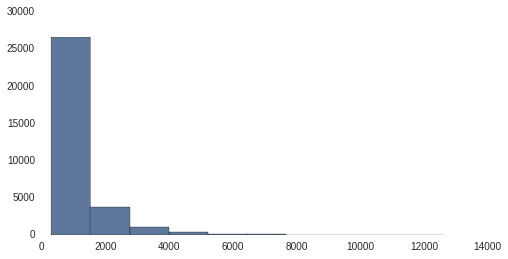

In [63]:
rounded_hours_series = pd.Series(rounded_hours)
plt.hist(rounded_hours_series)

# The_Elder_Scrolls_V: Stats

In [9]:
# So, let's first get all of the reviews for the game with the smallest amount of
# review data, i.e., Football Manager 2015 (not including GTAV)
reviews = get_reviews_for_game('data/The_Elder_Scrolls_V.txt')

In [10]:
# First of all, how many reviews are there?
print('number of reviews: {}'.format(len(reviews)))

number of reviews: 32789


# The_Elder_Scrolls_V: Review Length Distribution

In [11]:
# Here's a couple reviews from the beginning of the file
reviews[:3]

[{'hours': 4652.9,
  'review': "This is the game the never, ever ends. I picked this game up thinking I wouldn't like it having never played a previous TES game before. Sat in my Library untouched for about a month or two, and finally took the plunge. I was wrong. I was so very, very wrong. This is probably the best purchase I've ever made on steam. Add in the unlimited potential of modding, and it's an adventure that continues forever. I've probably restarted over a hundred times by now with a new character, and still only have beaten Alduin once. ONCE. There's still so much more do to and explore that I'm still discovering quests and areas and little hidden things. I still can't believe how much there is to do and I'm still finding more. At it stands I'll probably wake up one day having lost all touch with reality and actually start seeing the world as Skyrim with how much I've played. And I'm totally ok with that."},
 {'hours': 3210.9, 'review': 'Ruined my life. Five stars.'},
 {'ho

In [12]:
# Let's measure the lengths of each review using a "list comprehension"
lengths = [len(review['review']) for review in reviews]
# Let's print out the first 10 lengths, just to see what we're working with
lengths[:10]

[898, 27, 944, 404, 1246, 105, 185, 6567, 435, 216]

In [13]:
# Compute the average length value
avg_len = sum(lengths)/len(lengths)
print('average length: {}'.format(avg_len))

average length: 232.25490255878495


In [14]:
print("min review length: {}\nmax review length: {}".format(min(lengths), max(lengths)))

min review length: 1
max review length: 8000


In [15]:
# Let's try to make a list of rounded length values where we round to the nearest
# 300 (I know, that's a pretty strange kind of thing to do)
from math import ceil
# We can do this by diving each length by 300, then rounding up, then multiplyig by 300
rounded_lengths = [ceil(l/300)*300 for l in lengths]
print('original lengths (first 10):          {}\nrounded lengths (to the nearest 300): {}'.format(
    lengths[:10],
    rounded_lengths[:10]))

original lengths (first 10):          [898, 27, 944, 404, 1246, 105, 185, 6567, 435, 216]
rounded lengths (to the nearest 300): [900, 300, 1200, 600, 1500, 300, 300, 6600, 600, 300]


In [17]:
# Let's try to print out the freq dist in a nice way
# Bear with me as I attempt to use pandas, which is a very nice Python library
import pandas as pd

In [18]:
# Usually, when you use Pandas, you're using a dataframe, but a dataframe, as I understand
# it, it just made up on a set of "Series"
# Let's make a Series from our rounded lengths and then call its value_counts() method to
# get exactly what collections.Counter was doing (but we'll be able to use it to make a
# nice plot)
rounded_length_series = pd.Series(rounded_lengths)
rounded_length_series.value_counts()

300     26598
600      3326
900      1262
1200      605
1500      312
1800      175
2100      126
2400       78
2700       48
6600       44
3000       39
3300       34
3600       28
4200       19
3900       16
8100       14
4500       11
5400        9
4800        8
5100        7
5700        6
6000        6
7200        6
6300        6
7800        4
6900        2
dtype: int64

In [19]:
from data import FILTER_DICT
FILTER_DICT['The_Elder_Scrolls_V']['MAXLEN']

(array([  3.11860000e+04,   1.09200000e+03,   2.04000000e+02,
          1.21000000e+02,   4.40000000e+01,   3.80000000e+01,
          2.20000000e+01,   1.20000000e+01,   5.20000000e+01,
          1.80000000e+01]),
 array([  300.,  1080.,  1860.,  2640.,  3420.,  4200.,  4980.,  5760.,
         6540.,  7320.,  8100.]),
 <a list of 10 Patch objects>)

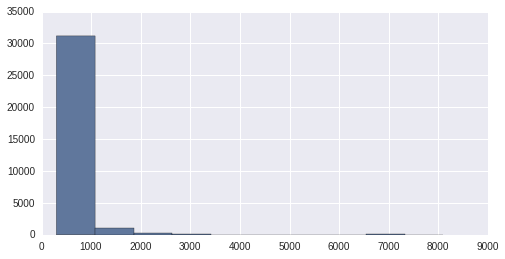

In [20]:
# The table above is nice, but let's do better and try to get a histogram
# Don't worry about all this importing stuff, it's just from something I read in a blog
# post
# Actually, go and check out the blog post here:
# http://nbviewer.ipython.org/github/mwaskom/seaborn/blob/master/examples/plotting_distributions.ipynb
# It's in, you guessed it, an IPython notebook! Shows what you can do with
# matplotlib.
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.hist(rounded_length_series)

In [58]:
# Playing around with this library called plotly
# Let's try to make a histogram in a slightly different kind of way
import plotly
import plotly.tools as tls
import plotly.plotly as py
from plotly.graph_objs import *
rounded_lengths_data = Data([
                             Histogram(
                                       x=rounded_lengths
                                       )
                             ])

In [59]:
plot_url = py.plot(rounded_lengths_data, filename='basic-histogram')
plot_url

'https://plot.ly/~mulhod/4'

In [60]:
py.iplot(rounded_lengths_data, filename='basic-histogram')

#  The_Elder_Scrolls_V: Hours Distribution

In [21]:
hours = [review['hours'] for review in reviews]
hours[:10]

[4652.9, 3210.9, 1164.7, 150.9, 247.4, 148.5, 12816.1, 92.4, 68.4, 477.1]

In [22]:
avg_hours = sum(hours)/len(hours)
print('average hours: {}'.format(avg_hours))

average hours: 230.92515477751627


In [23]:
print("min hours: {}\nmax hours: {}".format(min(hours), max(hours)))

min hours: 0.1
max hours: 21568.7


In [24]:
rounded_hours = [ceil(h/300)*300 for h in hours]
rounded_hours[:10]

[4800, 3300, 1200, 300, 300, 300, 12900, 300, 300, 600]

In [25]:
# Let's use pandas again instead of collections.Counter
rounded_hours_series = pd.Series(rounded_hours)
rounded_hours_series.value_counts()

300      26248
600       4356
900       1214
1200       418
1500       176
1800        98
3300        54
2100        48
4800        40
12900       39
2400        27
2700        24
3000        14
3900        11
3600         8
4200         3
4500         3
10200        1
6600         1
21600        1
11700        1
5700         1
6000         1
7800         1
5100         1
dtype: int64

(array([  3.25680000e+04,   1.33000000e+02,   4.50000000e+01,
          1.00000000e+00,   1.00000000e+00,   4.00000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+01,   2.16600000e+03,   4.32200000e+03,
          6.47800000e+03,   8.63400000e+03,   1.07900000e+04,
          1.29460000e+04,   1.51020000e+04,   1.72580000e+04,
          1.94140000e+04,   2.15700000e+04]),
 <a list of 10 Patch objects>)

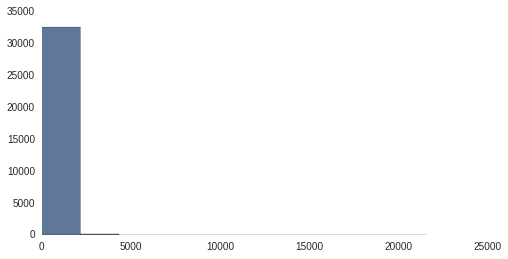

In [66]:
rounded_hours_series = pd.Series(rounded_hours)
plt.hist(rounded_hours_series)

# Warframe Stats

In [28]:
# review data
reviews = get_reviews_for_game('data/Warframe.txt')

In [29]:
print('number of reviews: {}'.format(len(reviews)))

number of reviews: 24635


# Warframe: Review Length Distribution

In [30]:
# Here's a couple reviews from the beginning of the file
reviews[:3]

[{'hours': 345.4,
  'review': 'This story requires a bit of setup. Last year, a friend of mine whom I\'d known from gaming for a long time contacted me and told me about this great new game that was in beta that he was backing as a founder (called a "Grandmaster" in-game) called Warframe. A third person cooperative shooter with elements of Phantasy Star Online/Diablo loot runs, procedurally generated levels, and more content being added all the time. The game was difficult to start, as there are many keys for various secret parkour maneuvers. Running along walls! Sliding down ziplines! Soon, I was completely hooked; my friend and I were playing late into the night, trying to grind out just one more piece necessary to build a new component or weapon, or trying to beat our best time on the Survival missions -- where you fend off an ever growing wave of foes as life support ticks down. Over the year, there were many great victories, hair raising last second escapes, and new friends joinin

In [31]:
# Let's measure the lengths of each review using a "list comprehension"
lengths = [len(review['review']) for review in reviews]
# Let's print out the first 10 lengths, just to see what we're working with
lengths[:10]

[3087, 579, 156, 55, 78, 4996, 288, 337, 3885, 1245]

In [32]:
# Compute the average length value
avg_len = sum(lengths)/len(lengths)
print('average length: {}'.format(avg_len))

average length: 254.90152222447736


In [33]:
print("min length: {}\nmax length: {}".format(min(lengths), max(lengths)))

min length: 1
max length: 8000


In [34]:
# Let's try to make a list of rounded length values where we round to the nearest
# 300 (I know, that's a pretty strange kind of thing to do)
from math import ceil
# We can do this by diving each length by 300, then rounding up, then multiplyig by 300
rounded_lengths = [ceil(l/300)*300 for l in lengths]
print('original lengths (first 10):          {}\nrounded lengths (to the nearest 300): {}'.format(
    lengths[:10],
    rounded_lengths[:10]))

original lengths (first 10):          [3087, 579, 156, 55, 78, 4996, 288, 337, 3885, 1245]
rounded lengths (to the nearest 300): [3300, 600, 300, 300, 300, 5100, 300, 600, 3900, 1500]


In [35]:
import pandas as pd
rounded_length_series = pd.Series(rounded_lengths)
rounded_length_series.value_counts()

300     19794
600      2388
900       907
1200      497
1500      323
1800      173
2100      133
2400       75
2700       73
3000       48
3300       43
3900       36
3600       28
5100       20
4800       18
4200       13
8100       13
5400       10
4500        9
6000        5
6900        5
5700        5
7800        5
7200        4
6300        4
6600        4
7500        2
dtype: int64

In [36]:
from data import FILTER_DICT
FILTER_DICT['Warframe']['MAXLEN']

(array([  2.30890000e+04,   9.93000000e+02,   2.08000000e+02,
          1.64000000e+02,   6.40000000e+01,   4.00000000e+01,
          3.50000000e+01,   9.00000000e+00,   1.30000000e+01,
          2.00000000e+01]),
 array([  300.,  1080.,  1860.,  2640.,  3420.,  4200.,  4980.,  5760.,
         6540.,  7320.,  8100.]),
 <a list of 10 Patch objects>)

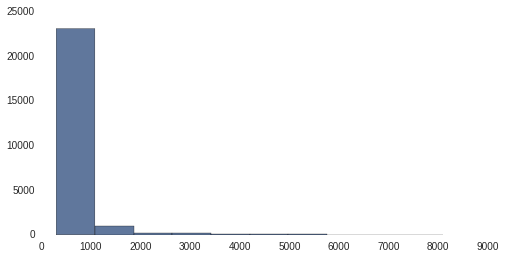

In [77]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.hist(rounded_length_series)

# Warframe Hours Distribution

In [39]:
hours = [review['hours'] for review in reviews]
hours[:10]

[345.4, 2486.5, 516.2, 523.3, 2944.5, 118.7, 8.3, 399.9, 2938.8, 487.4]

In [40]:
avg_hours = sum(hours)/len(hours)
print('average hours: {}'.format(avg_hours))

average hours: 296.38234625532743


In [41]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.0
max: 8616.4


In [42]:
rounded_hours = [ceil(h/300)*300 for h in hours]
rounded_hours[:10]

[600, 2700, 600, 600, 3000, 300, 300, 600, 3000, 600]

In [43]:
# Let's use pandas again instead of collections.Counter
rounded_hours_series = pd.Series(rounded_hours)
rounded_hours_series.value_counts()

300     17231
600      3475
900      1767
1200      905
1500      491
1800      276
2100      181
2400       92
2700       70
3000       66
3300       23
3600       17
3900        9
4200        7
6000        5
4800        4
4500        4
0           3
7500        2
8700        2
8400        1
5700        1
6300        1
5400        1
5100        1
dtype: int64

(array([  2.07090000e+04,   3.16300000e+03,   5.49000000e+02,
          1.59000000e+02,   3.30000000e+01,   9.00000000e+00,
          7.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00]),
 array([    0.,   870.,  1740.,  2610.,  3480.,  4350.,  5220.,  6090.,
         6960.,  7830.,  8700.]),
 <a list of 10 Patch objects>)

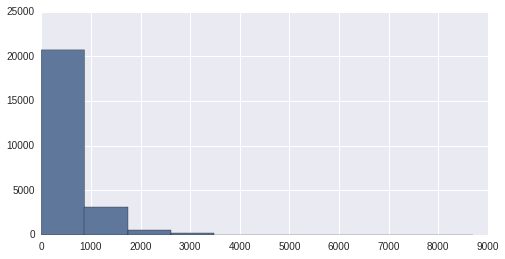

In [44]:
plt.hist(rounded_hours_series)